# Atlas notebooks

***

> This notebook reproduces and extends parts of the figures and products of the AR6-WGI Atlas. It is part of a notebook collection available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purposes. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Calculation and hatching of the uncertainty in projected delta changes.

08/07/2021

**M. Iturbide** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Santander, Spain).

This notebook is a simple example of uncertainty visualization in projected delta changes. Example data available at [auxiliary-material](./auxiliary-material) is used. The advanced method for the uncertainty visualization of the Atlas Chapter and the Interactive Atlas is included in [datasets-interactive-atlas/04_map_figures.R](../datasets-interactive-atlas/04_map_figures.R). Additionally, the base hatching R-functions are defined in [datasets-interactive-atlas/hatching-functions/hatching-functions.R](../datasets-interactive-atlas/hatching-functions/hatching-functions.R). Also, the notebook [load-remote-data_R.ipynb](./load-remote-data_R.ipynb) describes the generation of the example data used in this notebook.

### Load libraries, functions and data

We will use the following climate4R libraries:
 * `loadeR` to load data ([Iturbide et al., 2018](https://doi.org/10.1016/j.envsoft.2018.09.009))
 * `visualizeR` for data visualization ([Frías et al., 2018](https://doi.org/10.1016/j.envsoft.2017.09.008))
 
We will also need:
 * `sp` to work with spatial data ([Pebesma & Bivand, 2005](https://cran.r-project.org/doc/Rnews/Rnews_2005-2.pdf))

In [ ]:
library(loadeR)
library(visualizeR)
library(sp)

The base hatching R-functions are defined in [datasets-interactive-atlas / hatching-functions / hatching-functions.R](../datasets-interactive-atlas/hatching-functions/hatching-functions.R). Here, we will only use the `agreement` function, which is the simplest measure of uncertainty used in the Atlas. There are also `signal`and `signal.ens` functions that implement more advanced uncertainty measures. To load the function in the working environment use the `source` R base function as follows.

In [2]:
source("../datasets-interactive-atlas/hatching-functions/hatching-functions.R")

The data used in this example is available under the [auxiliary-material](./auxiliary-material) folder. They are two NetCDFs containing historical and RCP 8.5 precipitation climatologies for the 1986-2005 and 2041-2060 periods, respectively, and for a reduced set of CMIP5 models. The [load-remote-data_R.ipynb](./load-remote-data_R.ipynb) notebook shows how these data were generated.

You can use the `dataInventory` function from `loadeR` to check basic data information:

In [3]:
dataInventory("auxiliary-material/CMIP5_historical_pr.nc")

[2021-07-22 10:22:44] Doing inventory ...

[2021-07-22 10:22:45] Retrieving info for 'pr' (0 vars remaining)

[2021-07-22 10:22:45] Done.



$pr
$pr$Description
[1] "Precipitation"

$pr$DataType
[1] "float"

$pr$Shape
[1]  1  6 21 23

$pr$Units
[1] "mm"

$pr$DataSizeMb
[1] 0.011592

$pr$Version
[1] NA

$pr$Dimensions
$pr$Dimensions$member
$pr$Dimensions$member$Type
[1] "Ensemble"

$pr$Dimensions$member$Units
[1] ""

$pr$Dimensions$member$Values
[1] "Member_1" "Member_2" "Member_3" "Member_4" "Member_5" "Member_6"


$pr$Dimensions$time
$pr$Dimensions$time$Type
[1] "Time"

$pr$Dimensions$time$TimeStep
[1] ".0 days"

$pr$Dimensions$time$Units
[1] "days since 1985-12-01 12:00:00 GMT"

$pr$Dimensions$time$Date_range
[1] "1985-12-01T12:00:00Z - 1985-12-01T12:00:00Z"


$pr$Dimensions$lat
$pr$Dimensions$lat$Type
[1] "Lat"

$pr$Dimensions$lat$Units
[1] "degrees_north"

$pr$Dimensions$lat$Values
 [1] 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75

$pr$Dimensions$lat$Shape
[1] 21

$pr$Dimensions$lat$Coordinates
[1] "lat"


$pr$Dimensions$lon
$pr$Dimensions$lon$Type
[1] "Lon"

$pr$Dimensions$lon$Units
[1] "degrees_east"

$pr$Dimensions$lon$Values
 [1] -9 -7 -5 -3 -1  1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35

$pr$Dimensions$lon$Shape
[1] 23

$pr$Dimensions$lon$Coordinates
[1] "lon"

These data can be loaded into variables using `loadGridData`.

In [ ]:
hist <- loadGridData("auxiliary-material/CMIP5_historical_pr.nc", var = "pr")
scen <- loadGridData("auxiliary-material/CMIP5_rcp85_pr.nc", var = "pr")

### Parameter settings

We set some graphical parameters affecting the colorbar:

In [5]:
max.value <- 50
min.value <- -50
step.value <- 5
color.theme <- "BrBG"
reverse.colors <- FALSE

A list of color themes to use from `RColorBrewer` package can be obtained by issuing:
```R
RColorBrewer::display.brewer.all()
```
The following only affect the legend of the final figure. These values correspond to the data loaded above (see [load-remote-data_R.ipynb](./load-remote-data_R.ipynb)).

In [6]:
future.period <- 2041:2060
season <- c(12,1,2)

### Calculate delta change and the associated uncertainty

Future delta changes are the arithmetic difference between future and historical time slice climatologies. Relative deltas can also be calculated with respect to the multi-model mean. 


In [ ]:
delta <- gridArithmetics(climatology(scen), climatology(hist), operator = "-")
ensemble.mean <- function(grid) aggregateGrid(grid, aggr.mem = list(FUN = mean, na.rm = T))
delta.ens <- ensemble.mean(delta)
hist.ens <- ensemble.mean(climatology(hist))
# Relative delta
rel.delta <- gridArithmetics(delta.ens, 
                             hist.ens, 
                             100, 
                             operator = c("/", "*"))

Check the output with a first visualization of the delta change for each member of the ensemble.

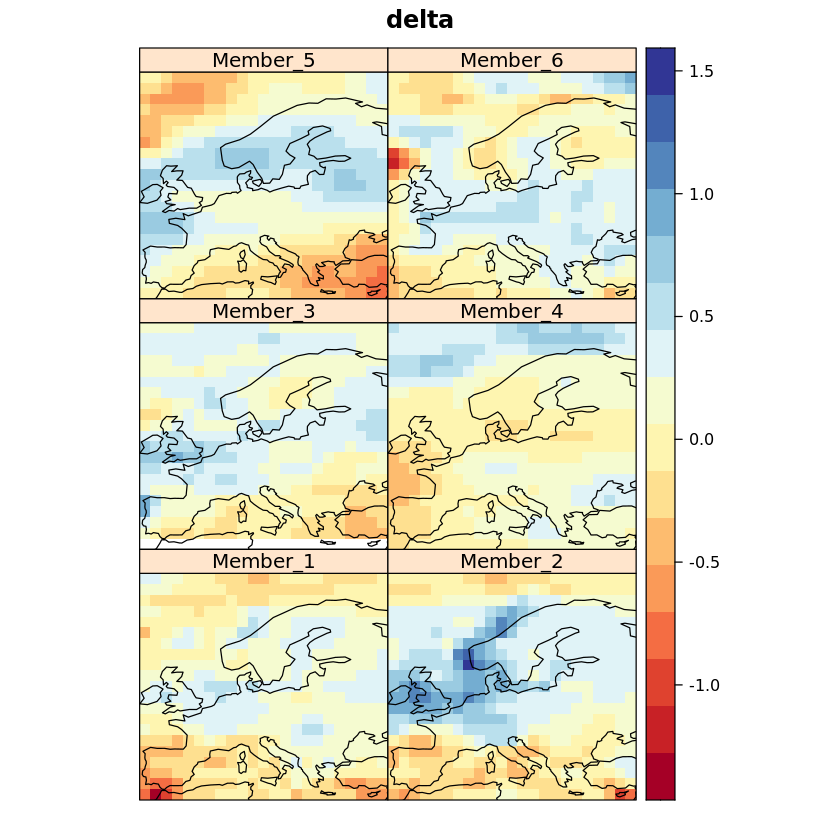

In [8]:
spatialPlot(delta, backdrop.theme = "coastline", main = "delta")

And this would be the relative delta change for the ensemble mean.

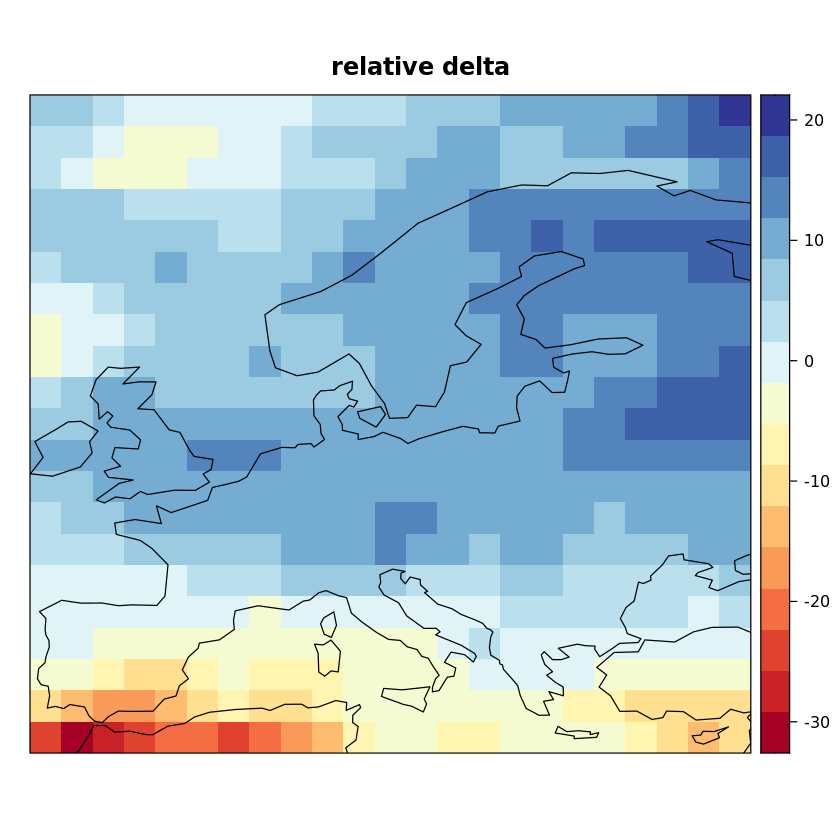

In [9]:
spatialPlot(rel.delta, backdrop.theme = "coastline", main = "relative delta")

We compute now the simple uncertainty measure (`agreement` function) and check the result visually.

[2021-07-22 10:22:50] - Aggregating members...

[2021-07-22 10:22:50] - Done.



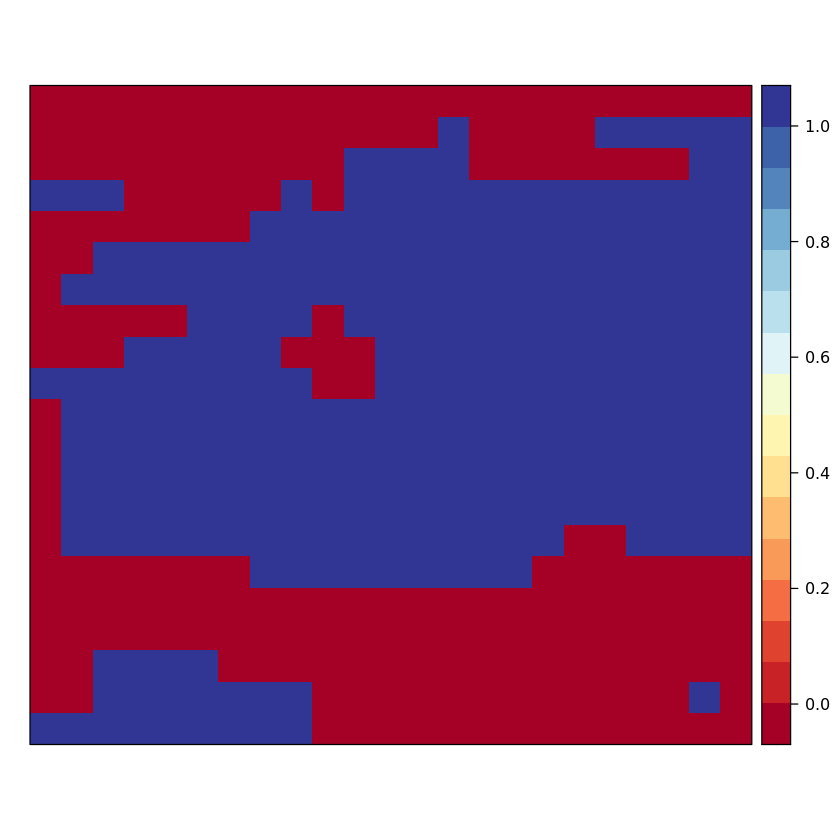

In [10]:
uncer <- aggregateGrid(delta, aggr.mem = list(FUN = agreement, th = 80))
spatialPlot(uncer)

This simple approach represents model agreement with two categories: 1 indicates high model agreement, where at least 80% of models agree on the sign of change; 0 indicates low model agreement, where fewer than 80% of models agree on sign of change. For more information on the simple approach, please refer to the AR6 WGI Cross-Chapter Box Atlas 1. Note that model agreement is computed at a gridbox level and is not representative of regionally aggregated results over larger regions.

This binary mask can be used to create the spatial object of the hatches, which we will then overlay on the original plots, hatching the areas where there is not enough model agreement. Let's obtain the hatching and check visually.

[2021-07-22 10:22:50] - Computing climatology...

[2021-07-22 10:22:50] - Done.



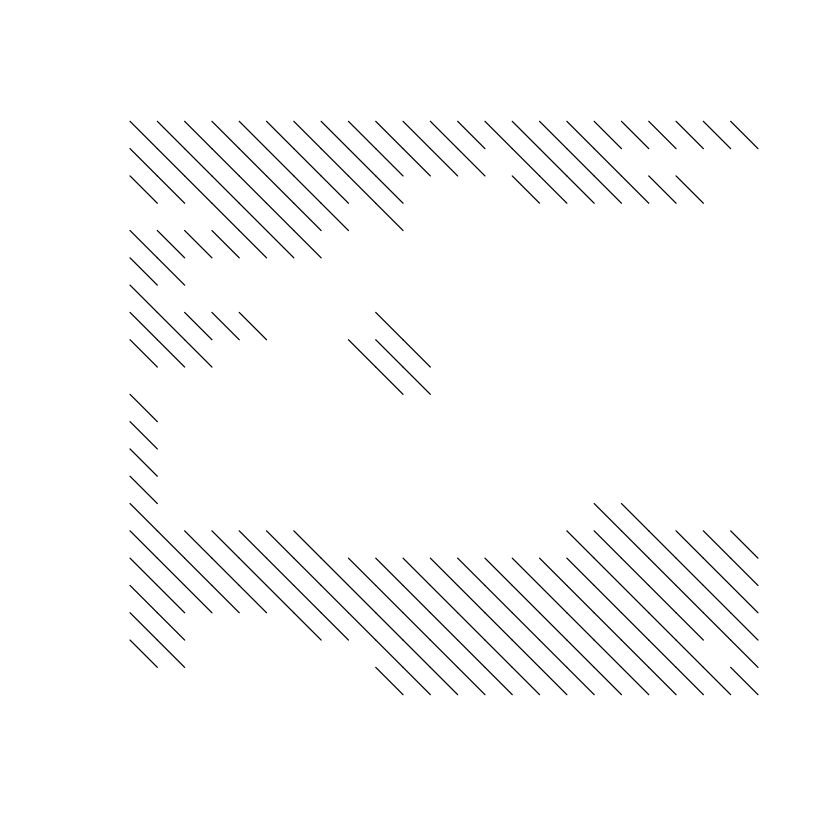

In [11]:
uncer.hatch <- map.hatching(clim = climatology(uncer), threshold = "0.5", angle = "-45",
                             condition = "LT", density = 1,  lwd = 0.6,
                             upscaling.aggr.fun = list(FUN = mean))
plot(uncer.hatch[[2]])

### Generate map figure

We can overlay the hatching on the relative delta to produce the final figure (the hatches are passed to argument `sp.layout`)

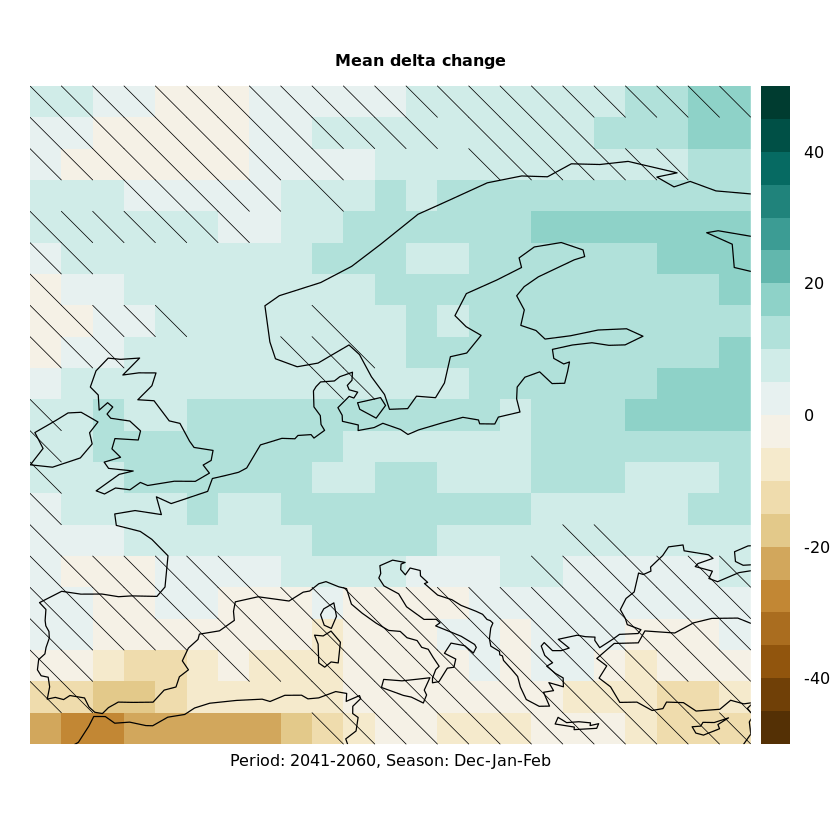

In [12]:
pl <- spatialPlot(rel.delta, 
            color.theme = color.theme, 
            rev.colors = reverse.colors, 
            at = seq(min.value, max.value, step.value), 
            set.max = max.value, set.min = min.value,
            backdrop.theme = "coastline",
            main = list("Mean delta change", cex = 0.8),
            xlab = list(paste0("Period: ", paste(range(future.period), collapse = "-"), ", Season: ", paste(month.abb[season], collapse = "-")), cex = 0.8),
            sp.layout = list(uncer.hatch),
            par.settings = list(axis.line = list(col = 'transparent')))
pl

We could also add the hatching to the ensemble mean of the absolute deltas (instead of the relative ones) just replacing in the above code the first line by:
```R
pl <- spatialPlot(ensemble.mean(delta), ...
```

### Session Information

In [13]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=en_US.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=en_US.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=en_US.UTF-8          LC_NAME=en_US.UTF-8          
 [9] LC_ADDRESS=en_US.UTF-8        LC_TELEPHONE=en_US.UTF-8     
[11] LC_MEASUREMENT=en_US.UTF-8    LC_IDENTIFICATION=en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] sp_1.4-5            visualizeR_1.6.1    transformeR_2.1.2  
[4] loadeR_1.7.1        climate4R.UDG_0.2.3 loadeR.java_1.1.1  
[7] rJava_1.0-4        

loaded via a namespace (and not attached):
 [1] viridis_0.6.1           maps_3.3.0              jsonlite_1.7.2         
 [4] v